In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("lab11A.ipynb")

---

<h3><center>E7 -  Introduction to Programming for Scientists and Engineers</center></h3>

<h2><center>Lab session #11-A <br></center></h2>

<h1><center>Numerical methods for scalar initial value problems<br></center></h1>

---

In [2]:
from resources.hashutils import *
import numpy as np
import matplotlib.pyplot as plt

# Question 1: Exponential cooling

Newton's law of cooling states that "The rate of heat loss of a body is directly proportional to the difference in the temperatures between the body and its environment." [[Wikipedia](https://en.wikipedia.org/wiki/Newton%27s_law_of_cooling)]. Assuming that the "rate of heat loss" is proportional to the rate of temperature loss, we immediately obtain a first order ODE for the temperature of the body:

\begin{equation*}
T'(t) = -\alpha(T(t)-T_a)
\end{equation*} 

+ $T$ is the temperature of the body, measured in degrees centrigrade.
+ $t$ is time, measured in seconds.
+ $T_a$ is the ambient temperature, measured in degrees centigrade.
+ $\alpha$ is a positive constant related to various physical quantities: the heat capacitance of the body, the heat transfer coefficient between the body and the environment, and the total exposed area of the body. $\alpha$ has units of 1/seconds.

This ODE is similar to one that was shown in lecture: $y'+y=0$, whose solutions are of the form $y(t)=Ce^{-t}$. Fixing the initial condition to be $y(0)=y_0$, we found a unique solution to the initial value problem: $y(t)=y_0 \:e^{-t}$ for all $t\geq 0$.

We can similarly find a solution to the cooling law with initial condition $T(0)=T_0$:

\begin{equation*}
T(t) = T_a + (T_0-T_a)e^{-\alpha t}\quad \forall\; t\geq 0
\end{equation*}

This solution is stated here without proof, since techniques for deriving this formula are outside of the scope of this class. A plot of $T(t)$ with $\alpha=0.001$ and $T_a=22$ is shown below.

<img src="resources/expdecay.png" width=600>

Having found an exact solution to the initial value problem, we would typically not bother to construct a numerical solution. We will nevertheless do so here in order to test our numerical methods on a simple ODE.

By the way, the name "cooling law" is a bit confusing, since the formula also applies when the ambient temperature $T_a$ is *higher* than $T(t)$, and hence the body is heating up. 


## Question 1.1: State equation

To construct our numerical method, we will need a function that returns the right-hand side of the cooling law, given the values of $\alpha$, $T_a$, and $T$:

\begin{equation*}
T' = f(T) = -\alpha(T-T_a)
\end{equation*}

Write a function called `cooling_law(T)` that takes a temperature `T` and returns $-\alpha(T-T_a)$. 

`alpha=0.001` and `Ta=22` should be defined as global constants, and should not be passed as inputs to the function. 

In [3]:
alpha = 0.001
Ta = 22
def cooling_law(T):
    Tprime = -alpha*(T-Ta)
    return Tprime

In [4]:
grader.check("q1p1")

q1p1 results: All test cases passed!

## Question 1.2: Time grid

Create a function called `get_time_grid(ts,h)` that take the total simulation time `ts` (in seconds) and the time step `h` (in seconds), and returns `tvec` and `K` where
+ `tvec` is a NumPy array of time instants ranging from 0 to `ts` (excluded), with a step size of `h`.
+ `K` is the number of eleements in `tvec`.

In [5]:
def get_time_grid(ts, h):
    tvec = np.arange(0,ts,h)
    K = len(tvec)
    return tvec, K

In [6]:
# Test your code
ts = 60
h = 20
tvec, K = get_time_grid(ts, h)

In [7]:
grader.check("q1p2")

q1p2 results: All test cases passed!

## Question 1.3: Exact solution

Write a function called `evaluate_sol(T0,t)` that takes an initial condition `T0` and a scalar or NumPy array `t` of time values, and evaluates the exact solution of the cooling IVP, given in the introduction. The return value should by a 1D NumPy array of the same length as `t`. 

In [8]:
def evaluate_sol(T0,t):
    sol = Ta + (T0 - Ta) * np.exp(-alpha*t)
    return sol

In [9]:
grader.check("q1p3")

q1p3 results: All test cases passed!

## Question 1.4: Euler's method

As stated in class, Euler's method constructs a solution to the initial value problem by iterating the the following formula:

\begin{equation*}
\hat{T}[k+1] = \hat{T}[k] + h\: f(\hat{T}[k])
\end{equation*}

The iteration begins with $\hat{T}[0]=T_0$, the given initial condition, and proceeds until $k=K-1$, i.e. filling an array of size $K$. 

Write a function `my_euler(ts,h,T0)` that carries out this computation. The function takes these input arguments:
+ `ts`, `h` : The final time and time step, as described in part 1.2
+ `T0` : The initial temperature.

It returns `tvec` and `That`, where `tvec` is the time grid (a 1D array), and `That` is the numerical solution (a 1D array).

In [15]:
def my_euler(ts,h,T0):

    # Create the time grid
    tvec, K = get_time_grid(ts, h)

    # Initialze T to an empty 1D NumPy array with K elements
    That = np.empty(K)

    # Set the zeroth element of T to the initial condition
    That[0] = T0

    # Iterate through the rest of T, setting values according to Euler's method
    for k in np.arange(1,K):
        That[k] = That[k-1] + h * cooling_law(That[k-1])

    return tvec, That

In [16]:
grader.check("q1p4")

q1p4 results: All test cases passed!

## Question 1.5: Generic error calculation

We define the total error incurred by a numerical method as
\begin{equation*}
e = \frac{1}{K}\sum_{k=0}^{K-1} \Big| \hat{y}[k]-y[k] \Big| 
\end{equation*}

Here, $\hat{y}[k]$ is the solution of an initial value problem provided by the numerical method, and $y[k]$ is its exact solution. To be precise, $y[k]$ is the value of the mathematical function $y(t)$ at time $t=kh$. That is, 

\begin{equation*}
y[k] = y(kh)
\end{equation*}

(Some people would call this an "abuse of notation".)

Write a function called `compute_error(yhat,ysol)` that takes:

+ `yhat` ... A numerical solution (a 1D NumPy array).
+ `ysol` ... The exact solution evaluated on the same time grid as `yhat` (a 1D NumPy array).

The function returns the value of the error between `yhat` and `ysol`. Try to write it as with a single line of code using NumPy aggregation methods.

In [17]:
def compute_error(yhat,ysol):
    error = (1/len(yhat))*np.sum(np.abs(yhat-ysol))
    return error

In [18]:
grader.check("q1p5")

q1p5 results: All test cases passed!

## Example usage and plot

The next cell computes the exact and approximate solutions (`Tsol` and `That`) with initial temperature `T0=100`, final time `ts=3600`, and time step `h=60`. It also computes the average error. 

In [19]:
T0 = 100
ts = 3600
h = 300
tvec, That = my_euler(ts,h,T0)
Tsol = evaluate_sol(T0,tvec)
e = compute_error(That,Tsol)

The next cell plots the result.

Text(0.5, 0, 'time [sec]')

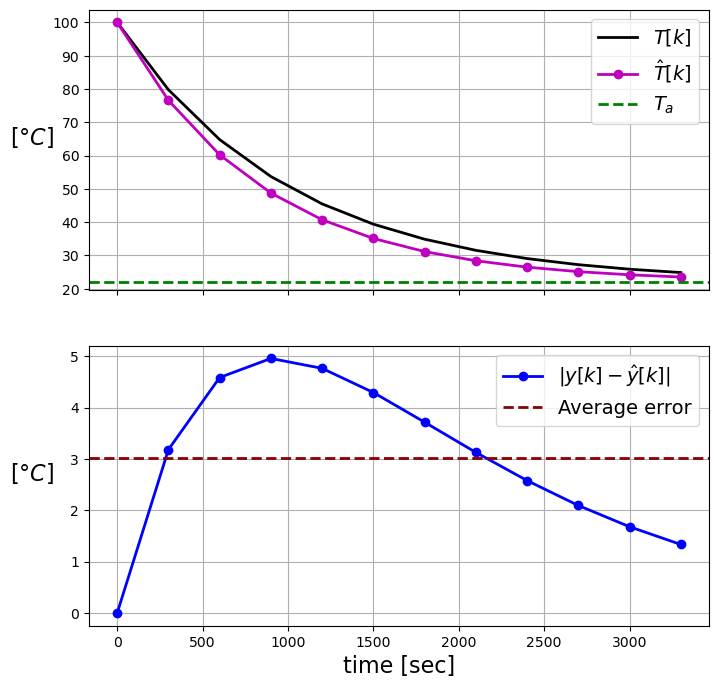

In [20]:
fig1, ax1 = plt.subplots(nrows=2,figsize=(8,8),sharex=True)
ax1[0].plot(tvec,Tsol,color='k',linewidth=2,label='$T[k]$')
ax1[0].plot(tvec,That,color='m',marker='o',linewidth=2,label='$\hat{T}[k]$')
ax1[0].axhline(Ta,color='g',linewidth=2,linestyle='--',label='$T_a$')
ax1[0].legend(fontsize=14)
ax1[0].set_ylabel('$[\degree C]$     ',rotation=0,fontsize=16)
ax1[0].grid()

ax1[1].plot(tvec,np.abs(Tsol-That),color='b',linewidth=2,marker='o',label='$|y[k]-\hat{y}[k]|$')
ax1[1].axhline(e,color='darkred',linestyle='--',linewidth=2,label='Average error')
ax1[1].legend(fontsize=14)
ax1[1].set_ylabel('$[\degree C]$          ',rotation=0,fontsize=16)
ax1[1].grid()
ax1[1].set_xlabel('time [sec]',fontsize=16)

## Question 1.6: Dependence of the error on the time step

Use the functions that you've written so far to evaluate the error of Euler's method for a range of step sizes.

Your code should produce these variables:
+ `hs` ... a 1D array of step size values ranging from 2 (included), to 100 (excluded), with a step value of 2. 
+ `e_array` ... a 1D array that holds the error values corresponding to each step size in `hs`.

The simulation shold have these parameters:
+ `T0 = 100`
+ `ts = 3600`

In [21]:
T0 = 100
ts = 3600
hs = np.arange(2,100,2)
e_array = np.empty(len(hs))
for i,h in enumerate(hs):
    tvec, That = my_euler(ts,h,T0)
    Tsol = evaluate_sol(T0,tvec)
    e_array[i] = compute_error(That,Tsol)

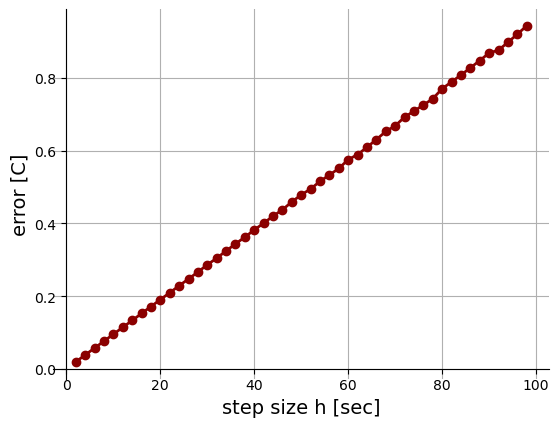

In [22]:
fig2, ax2 = plt.subplots()
ax2.plot(hs,e_array,color='darkred',linewidth=2,marker='o')
ax2.set_ylabel('error [C]',fontsize=14)
ax2.set_xlabel('step size h [sec]',fontsize=14)
ax2.spines[['top','right']].set_visible(False)
ax2.spines[['bottom','left']].set_position('zero')
ax2.grid()

In [23]:
grader.check("q1p6")

q1p6 results: All test cases passed!

# Question 2: Generic IVP solver

As discussed in class, many numerical methods for IVPs share a similar structure. They all advance forward in time in increments of $h\hat{s}_k$:

\begin{equation*}
\hat{y}[k+1] = \hat{y}[k] + h\: \hat{s}_k
\end{equation*}

where $\hat{s}_k$ is an estimate of the "ideal" slope value at step $k$. From this perspective, different numerical methods such as Euler's method, the midpoint method, and Heun's method, amount to different formulas for $\hat{s}_k$. Here we will use this observation to build a concise implementation of these three IVP solvers. 

**Note:**

The key to this implementation is the use of functions as inputs to other functions. In our case there are two parameters of the generic solver that are functions (and not mere values, such as `y0`)
+ The state equation $f$
+ The slope estimator $\hat{s}_k$

Implementing these as functions that are passed into the generic solver greatly increases the applicability of the code. It allows the code to be applied to any scalar ODE and any of a large family of numerical methods.
Programming techniques that use this type of "composition of functions" go under the heading of [*"functional programming"*](https://en.wikipedia.org/wiki/Functional_programming). 

## Question 2.1: Implement `my_ivp_solver`

Write a function called `my_ivp_solver(f,ts,h,y0,shat_estimator)`, whose arguments are:

+ `f` : A *function* that evaluates the state equation. (The input/output details of this function will not matter until Question 2.2)
+ `ts`: Total simulation time [seconds]
+ `h` : Time step [seconds] 
+ `y0` : Initial condition
+ `shat_estimator(f,yhatk,h,t)`: A *function* that evaluates $\hat{s}_k$ for a particular numerical method. This function takes arguments `(f,yhatk,h,t)`, where `f` and `h` are as defined above, `t` is the current time, and `yhatk` is the estimate at time step $k$. 

This function should implement the generic IVP solver described above. It should return `tvec, yhat`, similar to `my_euler` (except that `That` now has the generic name `yhat`)

In [239]:
def my_ivp_solver(f,ts,h,y0,shat_estimator):
    
    # Create the time grid  
    tvec, K = get_time_grid(ts, h)

    # Initialize the yhat array (allocate space and set the initial condition)
    yhat = np.empty(K)
    yhat[0] = y0

    # Run the iteration forward over all time.
    # At each step: 
    # 1. use shat_estimator to compute shat
    # 2. use it to compute the next value of yhat 
    for k in np.arange(0,K-1):
        shat = shat_estimator(f,yhat[k],h,tvec[k])
        yhat[k+1] = yhat[k] + h * shat

    return tvec, yhat

In [240]:
grader.check("q2p1")

q2p1 results: All test cases passed!

## Question 2.2: Euler's method

We will implement the three numerical methods (Euler's method, the midpoint method, and Heun's method) as three different versions of
`shat_estimator(f,yhatk,h,t)`. We begin with Euler's method, which is the simplest one. 

Create a function called `shat_euler` that takes the same arguments as `shat_estimator` and returns the value of $\hat{s}_k$ according to Euler's method:

\begin{equation*}
\hat{s}_k = f(\hat{y}[k],t)
\end{equation*}

The system equation $f$ has two arguments: $\hat{y}[k]$ and $t$. Hence, in the implementation, the function `f(yhatk,t)` will have *two* inputs: `yhatk` (estimate at step $k$) and `t` (time). This is in contrast with Question 1, where the state equation `cooling_law(T)` was only a function of the state, and did not have time as an input. Adding the time input will allow us to consider *time-varying* ambient temperatures. 

Notice also that `h` is not used in Euler's method. It must nevertheless be included as an input argument, since the argument list for the `shat_euler` function must match that of `shat_estimator`.

In [241]:
def shat_euler(f,yhatk,h,t):
    
    shat = f(yhatk,t)
    return shat

In [242]:
grader.check("q2p2")

q2p2 results: All test cases passed!

## Question 2.3: Midpoint method

Create a function called `shat_midpoint(f,yhatk,h,t)`, analogous to `shat_euler(f,yhatk,h,t)`, but for the midpoint method.

The midpoint method computation has two steps.

1. Advance by $h/2$ using Euler's method. Obtain the midpoint value $\tilde{y}_k$

\begin{equation*}
\tilde{y}_k = \hat{y}[k] + \frac{h}{2} \hat{y}'[k]
\end{equation*}

where $ \hat{y}'[k]=f(\hat{y}[k],t)$

2. Evaluate the slope at the midpoint. 

\begin{equation*}
\hat{s}_k = f(\tilde{y}_k\:,\;t\!+\!h/2)
\end{equation*}

In [243]:
def shat_midpoint(f,yhatk,h,t):
    ytilda = yhatk + (h/2)*shat_euler(f,yhatk,h,t) 
    shat = f(ytilda,t+h/2)
    return shat

In [244]:
grader.check("q2p3")

q2p3 results: All test cases passed!

## Question 2.4: Heun's method

Create a function called `shat_heun(f,yhatk,h,t)` that computes the slope according to the Heun's method.

The computation has three steps.

1. Advance by $h$ using Euler's method. Obtain the endpoint value $\tilde{y}_k$:

\begin{equation*}
\tilde{y}_k = \hat{y}[k] + h \:\hat{y}'[k] 
\end{equation*}

2. Evaluate the slope at the endpoint. 

\begin{equation*}
 \tilde{y}'_k = f(\tilde{y}_k,t+h)
\end{equation*}

3. Estimate the ideal slope as the average of the slopes at the start and end points. 

\begin{equation*}
\hat{s}_k = (\tilde{y}'_k  + \hat{y}'[k] ) / 2
\end{equation*}



In [245]:
def shat_heun(f,yhatk,h,t):
    ytilda = yhatk + h*shat_euler(f,yhatk,h,t)
    y_tilda_prime = f(ytilda,t+h)
    shat = (y_tilda_prime + shat_euler(f,yhatk,h,t))/2
    return shat

In [246]:
grader.check("q2p4")

q2p4 results: All test cases passed!

## Question 2.5: Time-varying ambient temperature

In Question 1 we assumed that the ambient temperature $T_a$ was held at a constant 22 degrees. Having included `t` as an argument to the state equation `f(yhatk,t)`, we can now allow $T_a$ to change with time. 

Let's suppose that the body whose temperature is being simulated is a pot of water on an electric stove, and that the stove is turned "on" for 5 out of every 15 minutes. This creates the profile of ambient temperature shown below:

<img src="resources/Ta.png" width=700>

$T_a(t)$ is expressed as a mathematical function as follows:

<img src="resources/Taeqn.png" width=350>


Create a function called `get_Ta(t)` that computes this function for a given *scalar* value `t` (not a NumPy array).

In [247]:
def get_Ta(t):
    if (t%900) < 300:
        Ta = 200
    else:
        Ta = 22
    return Ta

In [248]:
grader.check("q2p5")

q2p5 results: All test cases passed!

## Question 2.6: Implement a time-varying version of `cooling_law`

Finally, we need an updated version of the `cooling_law` function that includes time `t` as its second input argument.

Create a function called `cooling_law_with_time(T,t)` that takes a value of temperature `T` in degrees centrigrade, and a value of time `t` in seconds. The function should return the evaluation of the time-dependent state equation:
\begin{equation*}
f(T,t) =  -\alpha(T-T_a(t))
\end{equation*}
where $T_a(t)$ is the time-varying ambient temperature, obtained by calling `get_Ta(t)`.

In [249]:
def cooling_law_with_time(T,t):
    clwt = -alpha*(T - get_Ta(t))
    return clwt

In [250]:
grader.check("q2p6")

q2p6 results: All test cases passed!

## Question 2.7: Put it all together

We now have all of the necessary pieces to compute a numerical solution for the initial value problem using all of our three methods: Euler's method, the midpoint method, or Heun's method. 

Use `my_ivp_solver` to simulate the temperature of a pot of water on an electric stove, as it switches between 5 minutes "on" and 10 minutes "off" (as in Question 2.5). The parameters of the simulation are are:
+ `ts=3600` (seconds).
+ `h=300` (seconds)
+ `T0=100` (degrees centrigrade)

Run the solver with each of the three numerical methods, and save the results as `T_euler`,`T_midpoint`, and `T_heun`.

**Note**

+ Although it is not evaluated, you should try running it with smaller values of `h` and notice how the result improves. 

In [251]:
ts = 3600
h = 300
T0 = 100
tvec, T_euler    = my_ivp_solver(cooling_law_with_time,ts,h,T0,shat_euler)
tvec, T_midpoint = my_ivp_solver(cooling_law_with_time,ts,h,T0,shat_midpoint)
tvec, T_heun     = my_ivp_solver(cooling_law_with_time,ts,h,T0,shat_heun)

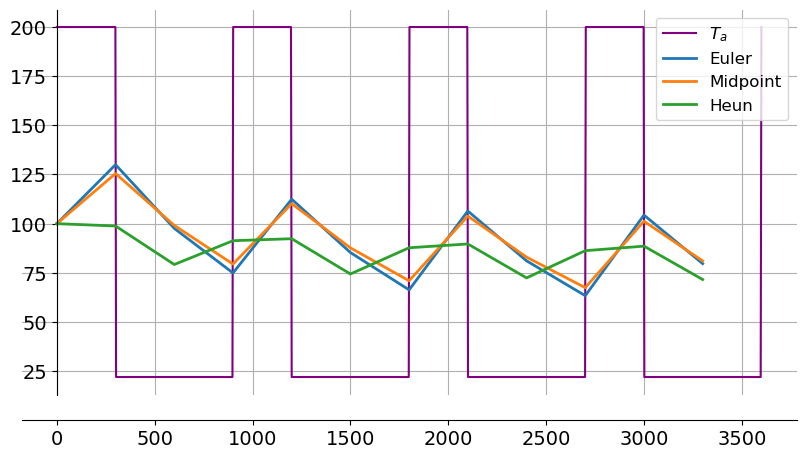

In [252]:
tfine = np.linspace(0,ts,1000)
Tafine = [get_Ta(t) for t in tfine]

fig3, ax3 = plt.subplots(figsize=(10,5))

ax3.plot(tfine,Tafine,color='purple',label='$T_a$')
ax3.plot(tvec,T_euler,linewidth=2,label='Euler')
ax3.plot(tvec,T_midpoint,linewidth=2,label='Midpoint')
ax3.plot(tvec,T_heun,linewidth=2,label='Heun')

ax3.tick_params('both',labelsize=14)
ax3.spines[['top','right']].set_visible(False)
ax3.spines[['bottom','left']].set_position('zero')
ax3.legend(loc='upper right',fontsize=12)
ax3.grid('--')

In [253]:
grader.check("q2p7")

q2p7 results: All test cases passed!

---

To double-check your work, the cell below will rerun all of the autograder tests.

In [254]:
grader.check_all()

q1p1 results: All test cases passed!

q1p2 results: All test cases passed!

q1p3 results: All test cases passed!

q1p4 results: All test cases passed!

q1p5 results: All test cases passed!

q1p6 results: All test cases passed!

q2p1 results: All test cases passed!

q2p2 results: All test cases passed!

q2p3 results: All test cases passed!

q2p4 results: All test cases passed!

q2p5 results: All test cases passed!

q2p6 results: All test cases passed!

q2p7 results: All test cases passed!

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

Make sure you submit the .zip file to Gradescope.

In [255]:
# Save your notebook first, then run this cell to export your submission.
grader.export(pdf=False)